Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load the data

In [34]:
df = pd.read_csv('datasets_house_prices.csv')
df.head()

explore the data

In [44]:
df.describe()
df.isnull().sum()

,0
Size (sqft),0
Bedrooms,0
Age,0
Proximity to Downtown (miles),0
Price,0


Visualize

<Figure size 1200x800 with 0 Axes>

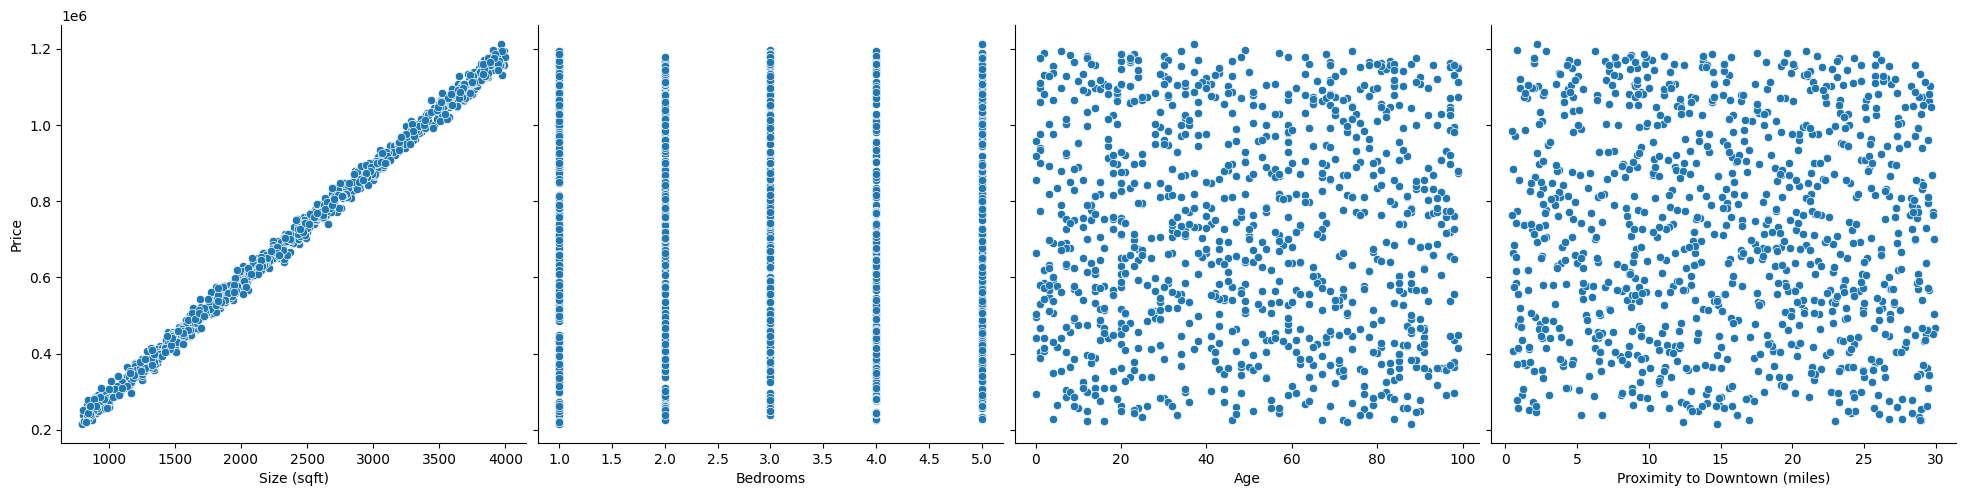

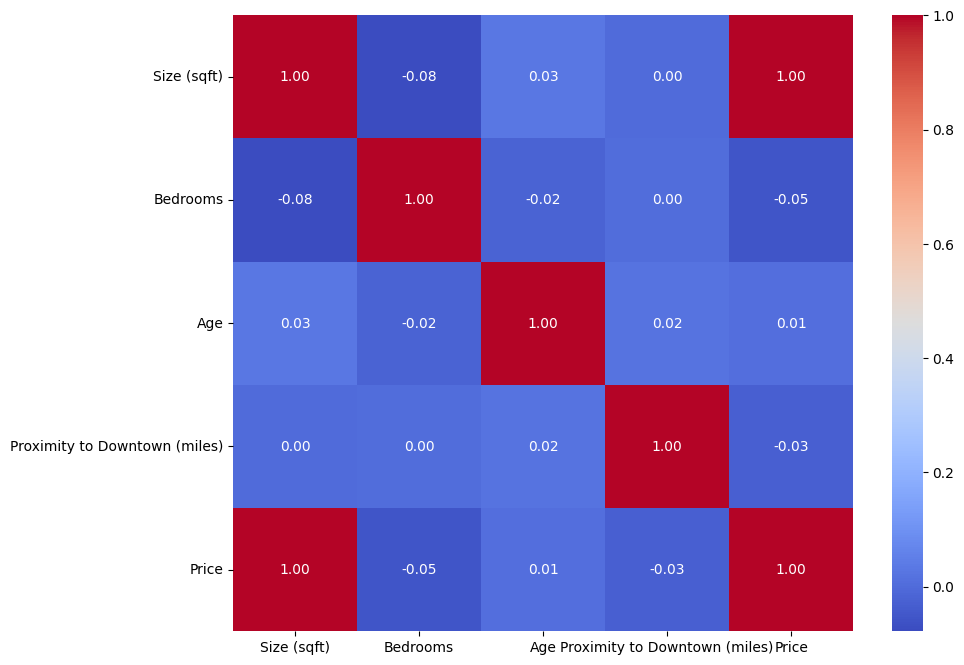

In [43]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, x_vars=['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'],
             y_vars=['Price'], height=5)
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Handle Missing Data

In [45]:
df.isnull().sum()
df.dropna(inplace=True)

Normalize/Standardize Data

In [47]:
X = df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluate the Model

Mean Squared Error: 100214724.63128743
R-squared: 0.9986314443568995
                                 Coefficient
Size (sqft)                    278975.285938
Bedrooms                         6804.519001
Age                             -6082.939258
Proximity to Downtown (miles)   -8459.853956


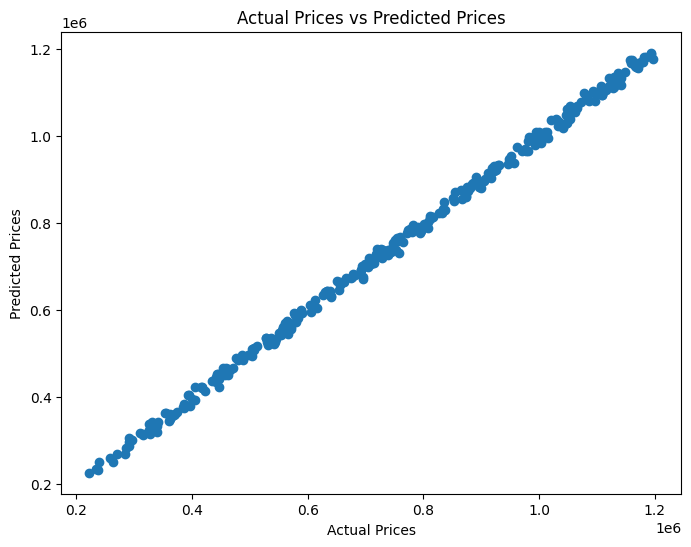

In [52]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

REPORT



*   First, I loaded and cleaned the data by removing missing values and scaling the features so they are on the same level. Then, I split the data into two parts: one for training the model and one for testing it. I built and trained a regression model to predict house prices. After that, I checked how well the model performed by comparing its predictions to the actual prices using some metrics.
*   Internet issues and some minor confusions regarding the instructions
*   To help understand the results, I created plots that show how each feature, like house size or number of bedrooms, affects the price. I used scatter plots to see the relationship between house prices and each feature. These visuals make it easier to see which features are important for predicting house prices.
*   The regression model helps estimate house prices based on factors like the house’s size, number of bedrooms, age, and how far it is from downtown. This is useful for real estate agents. But, the model might not be perfect because it assumes that everything changes in a straight line, and it might miss some important details or have problems if the data isn't good. To make it better, we can use more advanced techniques and check the model more carefully.

